In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.options.display.max_columns=None

In [2]:
df = pd.read_csv('final_features.csv')

In [3]:
df

,user_id,merchant_id,label,kind,gender,age_0,age_2,age_3,age_4,age_5,age_6,age_7,age_8,items_user,categories_user,merchants_user,brands_user,dates_user,action_types_user,periods_user,users_merchant,items_merchant,categories_merchant,brands_merchant,dates_merchant,action_types_merchant,periods_merchant,items_user_merchant,categories_user_merchant,brands_user_merchant,dates_user_merchant,action_types_user_merchant,periods_user_merchant,clicks_user,purchases_user,favourites_user,clicks_merchant,purchases_merchant,favourites_merchant,clicks_user_merchant,purchases_user_merchant,favourites_user_merchant,clicks_in_merchant_ratio_perspective,purchases_in_merchant_ratio_perspective,favourites_in_merchant_ratio_perspective,clicks_by_user_ratio_perspective,purchases_by_user_ratio_perspective,favourites_by_user_ratio_perspective,clicks_user_ratio,purchases_user_ratio,favourites_user_ratio,clicks_user_merchant_ratio,purchases_user_merchant_ratio,favourites_user_merchant_ratio,clicks_merchant_ratio,purchases_merchant_ratio,favorites_merchant_ratio,interval,clicks_user_period_max,purchases_user_period_max,favourites_user_period_max,clicks_user_period_mean,purchases_user_period_mean,favourites_user_period_mean,clicks_user_period_0,clicks_user_period_1,clicks_user_period_2,clicks_user_period_3,clicks_user_period_4,clicks_user_period_5,favourites_user_period_0,favourites_user_period_1,favourites_user_period_2,favourites_user_period_3,favourites_user_period_4,favourites_user_period_5,purchases_user_period_0,purchases_user_period_1,purchases_user_period_2,purchases_user_period_3,purchases_user_period_4,purchases_user_period_5,clicks_merchant_period_max,purchases_merchant_period_max,favourites_merchant_period_max,clicks_merchant_period_mean,purchases_merchant_period_mean,favourites_merchant_period_mean,clicks_merchant_period_0,clicks_merchant_period_1,clicks_merchant_period_2,clicks_merchant_period_3,clicks_merchant_period_4,clicks_merchant_period_5,favourites_merchant_period_0,favourites_merchant_period_1,favourites_merchant_period_2,favourites_merchant_period_3,favourites_merchant_period_4,favourites_merchant_period_5,purchases_merchant_period_0,purchases_merchant_period_1,purchases_merchant_period_2,purchases_merchant_period_3,purchases_merchant_period_4,purchases_merchant_period_5,clicks_user_merchant_period_0,clicks_user_merchant_period_1,clicks_user_merchant_period_2,clicks_user_merchant_period_3,clicks_user_merchant_period_4,clicks_user_merchant_period_5,favourites_user_merchant_period_0,favourites_user_merchant_period_1,favourites_user_merchant_period_2,favourites_user_merchant_period_3,favourites_user_merchant_period_4,favourites_user_merchant_period_5,purchases_user_merchant_period_0,purchases_user_merchant_period_1,purchases_user_merchant_period_2,purchases_user_merchant_period_3,purchases_user_merchant_period_4,purchases_user_merchant_period_5,double11_items_user,double11_categories_user,double11_merchants_user,double11_brands_user,double11_dates_user,double11_action_types_user,double11_periods_user,double11_users_merchant,double11_items_merchant,double11_categories_merchant,double11_brands_merchant,double11_dates_merchant,double11_action_types_merchant,double11_periods_merchant,double11_items_user_merchant,double11_categories_user_merchant,double11_brands_user_merchant,double11_dates_user_merchant,double11_action_types_user_merchant,double11_periods_user_merchant,double11_clicks_user,double11_purchases_user,double11_favourites_user,double11_clicks_merchant,double11_purchases_merchant,double11_favourites_merchant,double11_clicks_user_merchant,double11_purchases_user_merchant,double11_favourites_user_merchant
0,34944,2116,-1,train,0,0,0,0,0,1,0,0,0,1,1,1,1,1,1,1,227,1,1,1,39,3,3,1,1,1,1,1,1,1,0,0,310,13,11,1,0,0,1.0,0.0,0.0,0.003226,0.000000,0.000000,1.00,0.00,0.00,1.00,0.00,0.00,0.928144,0.038922,0.032934,0,1,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,285,10,11,103.333333,4.333333,3.666667,

In [4]:
df=df.fillna(0)

In [5]:
X = df.drop(['label','kind'],axis=1)

In [6]:
X

,user_id,merchant_id,gender,age_0,age_2,age_3,age_4,age_5,age_6,age_7,age_8,items_user,categories_user,merchants_user,brands_user,dates_user,action_types_user,periods_user,users_merchant,items_merchant,categories_merchant,brands_merchant,dates_merchant,action_types_merchant,periods_merchant,items_user_merchant,categories_user_merchant,brands_user_merchant,dates_user_merchant,action_types_user_merchant,periods_user_merchant,clicks_user,purchases_user,favourites_user,clicks_merchant,purchases_merchant,favourites_merchant,clicks_user_merchant,purchases_user_merchant,favourites_user_merchant,clicks_in_merchant_ratio_perspective,purchases_in_merchant_ratio_perspective,favourites_in_merchant_ratio_perspective,clicks_by_user_ratio_perspective,purchases_by_user_ratio_perspective,favourites_by_user_ratio_perspective,clicks_user_ratio,purchases_user_ratio,favourites_user_ratio,clicks_user_merchant_ratio,purchases_user_merchant_ratio,favourites_user_merchant_ratio,clicks_merchant_ratio,purchases_merchant_ratio,favorites_merchant_ratio,interval,clicks_user_period_max,purchases_user_period_max,favourites_user_period_max,clicks_user_period_mean,purchases_user_period_mean,favourites_user_period_mean,clicks_user_period_0,clicks_user_period_1,clicks_user_period_2,clicks_user_period_3,clicks_user_period_4,clicks_user_period_5,favourites_user_period_0,favourites_user_period_1,favourites_user_period_2,favourites_user_period_3,favourites_user_period_4,favourites_user_period_5,purchases_user_period_0,purchases_user_period_1,purchases_user_period_2,purchases_user_period_3,purchases_user_period_4,purchases_user_period_5,clicks_merchant_period_max,purchases_merchant_period_max,favourites_merchant_period_max,clicks_merchant_period_mean,purchases_merchant_period_mean,favourites_merchant_period_mean,clicks_merchant_period_0,clicks_merchant_period_1,clicks_merchant_period_2,clicks_merchant_period_3,clicks_merchant_period_4,clicks_merchant_period_5,favourites_merchant_period_0,favourites_merchant_period_1,favourites_merchant_period_2,favourites_merchant_period_3,favourites_merchant_period_4,favourites_merchant_period_5,purchases_merchant_period_0,purchases_merchant_period_1,purchases_merchant_period_2,purchases_merchant_period_3,purchases_merchant_period_4,purchases_merchant_period_5,clicks_user_merchant_period_0,clicks_user_merchant_period_1,clicks_user_merchant_period_2,clicks_user_merchant_period_3,clicks_user_merchant_period_4,clicks_user_merchant_period_5,favourites_user_merchant_period_0,favourites_user_merchant_period_1,favourites_user_merchant_period_2,favourites_user_merchant_period_3,favourites_user_merchant_period_4,favourites_user_merchant_period_5,purchases_user_merchant_period_0,purchases_user_merchant_period_1,purchases_user_merchant_period_2,purchases_user_merchant_period_3,purchases_user_merchant_period_4,purchases_user_merchant_period_5,double11_items_user,double11_categories_user,double11_merchants_user,double11_brands_user,double11_dates_user,double11_action_types_user,double11_periods_user,double11_users_merchant,double11_items_merchant,double11_categories_merchant,double11_brands_merchant,double11_dates_merchant,double11_action_types_merchant,double11_periods_merchant,double11_items_user_merchant,double11_categories_user_merchant,double11_brands_user_merchant,double11_dates_user_merchant,double11_action_types_user_merchant,double11_periods_user_merchant,double11_clicks_user,double11_purchases_user,double11_favourites_user,double11_clicks_merchant,double11_purchases_merchant,double11_favourites_merchant,double11_clicks_user_merchant,double11_purchases_user_merchant,double11_favourites_user_merchant
0,34944,2116,0,0,0,0,0,1,0,0,0,1,1,1,1,1,1,1,227,1,1,1,39,3,3,1,1,1,1,1,1,1,0,0,310,13,11,1,0,0,1.0,0.0,0.0,0.003226,0.000000,0.000000,1.00,0.00,0.00,1.00,0.00,0.00,0.928144,0.038922,0.032934,0,1,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,285,10,11,103.333333,4.333333,3.666667,0.0,0.0,0.0,1.0,24.0

In [7]:
y = df['label'] 

In [8]:
from sklearn.ensemble import RandomForestRegressor

In [9]:
rf = RandomForestRegressor(n_estimators=100, random_state=0)

In [10]:
rf.fit(X, y)

RandomForestRegressor(random_state=0)

In [11]:
importances = rf.feature_importances_


In [12]:
cols=X.columns 

In [13]:
feature_names = cols

In [14]:
indices = np.argsort(importances)[::-1]


In [15]:
lis = []

In [16]:
print("Feature ranking:")
for f in range(X.shape[1]):
    if (f<30):
        lis.append(feature_names[indices[f]])

Feature ranking:


In [17]:
lis

['purchases_merchant_ratio',
 'user_id',
 'double11_purchases_user_merchant',
 'double11_brands_merchant',
 'merchant_id',
 'double11_purchases_user',
 'clicks_user_merchant_period_5',
 'gender',
 'clicks_user_period_5',
 'age_7',
 'age_4',
 'interval',
 'clicks_by_user_ratio_perspective',
 'clicks_user_period_mean',
 'age_2',
 'age_3',
 'age_0',
 'favourites_user_period_5',
 'age_5',
 'double11_clicks_merchant',
 'favourites_merchant_period_4',
 'age_6',
 'clicks_user',
 'favorites_merchant_ratio',
 'dates_merchant',
 'clicks_merchant_period_5',
 'clicks_user_merchant',
 'double11_clicks_user_merchant',
 'clicks_user_merchant_period_4',
 'clicks_user_period_max']

In [18]:
lis.insert(0,'label')

In [19]:
lis.insert(1,'kind')

In [20]:
new_df = df[lis]

In [21]:
new_df

,label,kind,purchases_merchant_ratio,user_id,double11_purchases_user_merchant,double11_brands_merchant,merchant_id,double11_purchases_user,clicks_user_merchant_period_5,gender,clicks_user_period_5,age_7,age_4,interval,clicks_by_user_ratio_perspective,clicks_user_period_mean,age_2,age_3,age_0,favourites_user_period_5,age_5,double11_clicks_merchant,favourites_merchant_period_4,age_6,clicks_user,favorites_merchant_ratio,dates_merchant,clicks_merchant_period_5,clicks_user_merchant,double11_clicks_user_merchant,clicks_user_merchant_period_4,clicks_user_period_max
0,-1,train,0.038922,34944,0.0,1.0,2116,0.0,1.0,0,1.0,0,0,0,0.003226,1.0,0,0,0,0.0,1,81.0,0.0,0,1,0.032934,39,285.0,1,0.0,0.0,1
1,-1,train,0.009569,252288,0.0,1.0,3990,0.0,0.0,0,0.0,0,0,0,0.002525,1.0,0,1,0,0.0,0,15.0,3.0,0,1,0.043062,105,47.0,1,0.0,0.0,1
2,-1,train,0.235015,210048,0.0,1.0,4255,0.0,0.0,1,0.0,0,0,0,0.001052,3.0,0,1,0,0.0,0,25.0,5.0,0,3,0.012147,114,74.0,3,0.0,0.0,3
3,-1,train,0.235015,210048,0.0,1.0,4255,0.0,0.0,1,0.0,0,0,0,0.001052,3.0,0,1,0,0.0,0,25.0,5.0,0,3,0.012147,114,74.0,3,0.0,0.0,3
4,-1,train,0.235015,210048,0.0,1.0,4255,0.0,0.0,1,0.0,0,0,0,0.001052,3.0,0,1,0,0.0,0,25.0,5.0,0,3,0.012147,114,74.0,3,0.0,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9157,-1,test,0.041420,340607,0.0,1.0,2692,0.0,0.0,1,0.0,0,0,0,0.009615,3.0,0,0,0,0.0,0,10.0,0.0,1,3,0.035503,81,21.0,3,0.0,0.0,3
9158,-1,test,0.041420,340607,0.0,1.0,2692,0.0,0.0,1,0.0,0,0,0,0.009615,3.0,0,0,0,0.0,0,10.0,0.0,1,3,0.035503,81,21.0,3,0.0,0.0,3
9159,-1,test,0.041420,340607,0.0,1.0,2692,0.0,0.0,1,0.0,0,0,0,0.009615,3.0,0,0,0,0.0,0,10.0,0.0,1,3,0.035503,81,21.0,3,0.0,0.0,3
9160,-1,test,0.041420,340607,0.0,1.0,2692,0.0,0.0,1,0.0,0,0,0,0.009615,3.0,0,0,0,0.0,0,10.0,0.0,1,3,0.035503,81,21.0,3,0.0,0.0,3


## PCA

In [22]:
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.decomposition import PCA
from xgboost import train

/Users/shruthivenkatachalam/mambaforge/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [23]:
VALID_SET_SIZE = 0.2
PCA_COMPONENTS = 5
RANDOM_SEED = 42
N_FEATURES = 150

In [24]:
pca_df = new_df.drop(['kind', 'label'], axis=1)
pca = PCA(n_components=PCA_COMPONENTS)
pca.fit(pca_df)
new_df = new_df.join(pd.DataFrame(pca.transform(pca_df), index=pca_df.index).add_prefix('pca_'))

In [25]:
new_df

,label,kind,purchases_merchant_ratio,user_id,double11_purchases_user_merchant,double11_brands_merchant,merchant_id,double11_purchases_user,clicks_user_merchant_period_5,gender,clicks_user_period_5,age_7,age_4,interval,clicks_by_user_ratio_perspective,clicks_user_period_mean,age_2,age_3,age_0,favourites_user_period_5,age_5,double11_clicks_merchant,favourites_merchant_period_4,age_6,clicks_user,favorites_merchant_ratio,dates_merchant,clicks_merchant_period_5,clicks_user_merchant,double11_clicks_user_merchant,clicks_user_merchant_period_4,clicks_user_period_max,pca_0,pca_1,pca_2,pca_3,pca_4
0,-1,train,0.038922,34944,0.0,1.0,2116,0.0,1.0,0,1.0,0,0,0,0.003226,1.0,0,0,0,0.0,1,81.0,0.0,0,1,0.032934,39,285.0,1,0.0,0.0,1,179809.538097,968.147940,218.781298,67.756514,-4.579520
1,-1,train,0.009569,252288,0.0,1.0,3990,0.0,0.0,0,0.0,0,0,0,0.002525,1.0,0,1,0,0.0,0,15.0,3.0,0,1,0.043062,105,47.0,1,0.0,0.0,1,-37534.843598,-862.364242,-12.974644,-13.981356,-10.931013
2,-1,train,0.235015,210048,0.0,1.0,4255,0.0,0.0,1,0.0,0,0,0,0.001052,3.0,0,1,0,0.0,0,25.0,5.0,0,3,0.012147,114,74.0,3,0.0,0.0,3,4705.101305,-1136.075092,16.591442,-15.150901,-10.599933
3,-1,train,0.235015,210048,0.0,1.0,4255,0.0,0.0,1,0.0,0,0,0,0.001052,3.0,0,1,0,0.0,0,25.0,5.0,0,3,0.012147,114,74.0,3,0.0,0.0,3,4705.101305,-1136.075092,16.591442,-15.150901,-10.599933
4,-1,train,0.235015,210048,0.0,1.0,4255,0.0,0.0,1,0.0,0,0,0,0.001052,3.0,0,1,0,0.0,0,25.0,5.0,0,3,0.012147,114,74.0,3,0.0,0.0,3,4705.101305,-1136.075092,16.591442,-15.150901,-10.599933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9157,-1,test,0.041420,340607,0.0,1.0,2692,0.0,0.0,1,0.0,0,0,0,0.009615,3.0,0,0,0,0.0,0,10.0,0.0,1,3,0.035503,81,21.0,3,0.0,0.0,3,-125853.575624,453.903639,-41.831551,-11.157558,-8.885342
9158,-1,test,0.041420,340607,0.0,1.0,2692,0.0,0.0,1,0.0,0,0,0,0.009615,3.0,0,0,0,0.0,0,10.0,0.0,1,3,0.035503,81,21.0,3,0.0,0.0,3,-125853.575624,453.903639,-41.831551,-11.157558,-8.885342
9159,-1,test,0.041420,340607,0.0,1.0,2692,0.0,0.0,1,0.0,0,0,0,0.009615,3.0,0,0,0,0.0,0,10.0,0.0,1,3,0.035503,81,21.0,3,0.0,0.0,3,-125853.575624,453.903639,-41.831551,-11.157558,-8.885342
9160,-1,test,0.041420,340607,0.0,1.0,2692,0.0,0.0,1,0.0,0,0,0,0.009615,3.0,0,0,0,0.0,0,10.0,0.0,1,3,0.035503,81,21.0,3,0.0,0.0,3,-125853.575624,453.903639,-41.831551,-11.157558,-8.885342


In [26]:
new_df['label'] = new_df['label'].apply(lambda x: 0 if x == -1 else x)

## split train test

In [27]:
df_train = new_df[new_df['kind'] == 'train'].drop(['kind'], axis=1)
df_test = new_df[new_df['kind'] == 'test'].drop(['kind', 'label'], axis=1)


In [28]:
df_train

,label,purchases_merchant_ratio,user_id,double11_purchases_user_merchant,double11_brands_merchant,merchant_id,double11_purchases_user,clicks_user_merchant_period_5,gender,clicks_user_period_5,age_7,age_4,interval,clicks_by_user_ratio_perspective,clicks_user_period_mean,age_2,age_3,age_0,favourites_user_period_5,age_5,double11_clicks_merchant,favourites_merchant_period_4,age_6,clicks_user,favorites_merchant_ratio,dates_merchant,clicks_merchant_period_5,clicks_user_merchant,double11_clicks_user_merchant,clicks_user_merchant_period_4,clicks_user_period_max,pca_0,pca_1,pca_2,pca_3,pca_4
0,0,0.038922,34944,0.0,1.0,2116,0.0,1.0,0,1.0,0,0,0,0.003226,1.0,0,0,0,0.0,1,81.0,0.0,0,1,0.032934,39,285.0,1,0.0,0.0,1,179809.538097,968.147940,218.781298,67.756514,-4.579520
1,0,0.009569,252288,0.0,1.0,3990,0.0,0.0,0,0.0,0,0,0,0.002525,1.0,0,1,0,0.0,0,15.0,3.0,0,1,0.043062,105,47.0,1,0.0,0.0,1,-37534.843598,-862.364242,-12.974644,-13.981356,-10.931013
2,0,0.235015,210048,0.0,1.0,4255,0.0,0.0,1,0.0,0,0,0,0.001052,3.0,0,1,0,0.0,0,25.0,5.0,0,3,0.012147,114,74.0,3,0.0,0.0,3,4705.101305,-1136.075092,16.591442,-15.150901,-10.599933
3,0,0.235015,210048,0.0,1.0,4255,0.0,0.0,1,0.0,0,0,0,0.001052,3.0,0,1,0,0.0,0,25.0,5.0,0,3,0.012147,114,74.0,3,0.0,0.0,3,4705.101305,-1136.075092,16.591442,-15.150901,-10.599933
4,0,0.235015,210048,0.0,1.0,4255,0.0,0.0,1,0.0,0,0,0,0.001052,3.0,0,1,0,0.0,0,25.0,5.0,0,3,0.012147,114,74.0,3,0.0,0.0,3,4705.101305,-1136.075092,16.591442,-15.150901,-10.599933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4631,0,0.235015,230015,0.0,1.0,4255,0.0,0.0,0,0.0,0,1,0,0.000702,2.0,0,0,0,0.0,0,25.0,5.0,0,2,0.012147,114,74.0,2,0.0,0.0,2,-15261.898267,-1131.977299,16.699081,-14.999357,-10.939882
4632,0,0.235015,230015,0.0,1.0,4255,0.0,0.0,0,0.0,0,1,0,0.000702,2.0,0,0,0,0.0,0,25.0,5.0,0,2,0.012147,114,74.0,2,0.0,0.0,2,-15261.898267,-1131.977299,16.699081,-14.999357,-10.939882
4633,0,0.046512,64895,0.0,0.0,3491,0.0,0.0,0,0.0,0,0,0,0.025000,1.0,0,1,0,0.0,0,0.0,0.0,0,1,0.023256,15,0.0,1,0.0,0.0,1,149858.254869,-400.800911,-77.416160,59.382689,-5.345817
4634,0,0.235015,5759,0.0,1.0,4255,0.0,0.0,0,0.0,0,0,0,0.000000,0.0,0,0,0,0.0,0,25.0,5.0,1,0,0.012147,114,74.0,0,0.0,0.0,0,208994.097022,-1177.976144,15.341719,-15.516294,-11.822645


## Downsampling

In [29]:
import pandas as pd
from sklearn.utils import resample

In [30]:
# Separate majority and minority classes
df_majority = df_train[df_train.label==0]
df_minority = df_train[df_train.label==1]

In [31]:
df_majority

,label,purchases_merchant_ratio,user_id,double11_purchases_user_merchant,double11_brands_merchant,merchant_id,double11_purchases_user,clicks_user_merchant_period_5,gender,clicks_user_period_5,age_7,age_4,interval,clicks_by_user_ratio_perspective,clicks_user_period_mean,age_2,age_3,age_0,favourites_user_period_5,age_5,double11_clicks_merchant,favourites_merchant_period_4,age_6,clicks_user,favorites_merchant_ratio,dates_merchant,clicks_merchant_period_5,clicks_user_merchant,double11_clicks_user_merchant,clicks_user_merchant_period_4,clicks_user_period_max,pca_0,pca_1,pca_2,pca_3,pca_4
0,0,0.038922,34944,0.0,1.0,2116,0.0,1.0,0,1.0,0,0,0,0.003226,1.0,0,0,0,0.0,1,81.0,0.0,0,1,0.032934,39,285.0,1,0.0,0.0,1,179809.538097,968.147940,218.781298,67.756514,-4.579520
1,0,0.009569,252288,0.0,1.0,3990,0.0,0.0,0,0.0,0,0,0,0.002525,1.0,0,1,0,0.0,0,15.0,3.0,0,1,0.043062,105,47.0,1,0.0,0.0,1,-37534.843598,-862.364242,-12.974644,-13.981356,-10.931013
2,0,0.235015,210048,0.0,1.0,4255,0.0,0.0,1,0.0,0,0,0,0.001052,3.0,0,1,0,0.0,0,25.0,5.0,0,3,0.012147,114,74.0,3,0.0,0.0,3,4705.101305,-1136.075092,16.591442,-15.150901,-10.599933
3,0,0.235015,210048,0.0,1.0,4255,0.0,0.0,1,0.0,0,0,0,0.001052,3.0,0,1,0,0.0,0,25.0,5.0,0,3,0.012147,114,74.0,3,0.0,0.0,3,4705.101305,-1136.075092,16.591442,-15.150901,-10.599933
4,0,0.235015,210048,0.0,1.0,4255,0.0,0.0,1,0.0,0,0,0,0.001052,3.0,0,1,0,0.0,0,25.0,5.0,0,3,0.012147,114,74.0,3,0.0,0.0,3,4705.101305,-1136.075092,16.591442,-15.150901,-10.599933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4631,0,0.235015,230015,0.0,1.0,4255,0.0,0.0,0,0.0,0,1,0,0.000702,2.0,0,0,0,0.0,0,25.0,5.0,0,2,0.012147,114,74.0,2,0.0,0.0,2,-15261.898267,-1131.977299,16.699081,-14.999357,-10.939882
4632,0,0.235015,230015,0.0,1.0,4255,0.0,0.0,0,0.0,0,1,0,0.000702,2.0,0,0,0,0.0,0,25.0,5.0,0,2,0.012147,114,74.0,2,0.0,0.0,2,-15261.898267,-1131.977299,16.699081,-14.999357,-10.939882
4633,0,0.046512,64895,0.0,0.0,3491,0.0,0.0,0,0.0,0,0,0,0.025000,1.0,0,1,0,0.0,0,0.0,0.0,0,1,0.023256,15,0.0,1,0.0,0.0,1,149858.254869,-400.800911,-77.416160,59.382689,-5.345817
4634,0,0.235015,5759,0.0,1.0,4255,0.0,0.0,0,0.0,0,0,0,0.000000,0.0,0,0,0,0.0,0,25.0,5.0,1,0,0.012147,114,74.0,0,0.0,0.0,0,208994.097022,-1177.976144,15.341719,-15.516294,-11.822645


In [32]:
df_minority

,label,purchases_merchant_ratio,user_id,double11_purchases_user_merchant,double11_brands_merchant,merchant_id,double11_purchases_user,clicks_user_merchant_period_5,gender,clicks_user_period_5,age_7,age_4,interval,clicks_by_user_ratio_perspective,clicks_user_period_mean,age_2,age_3,age_0,favourites_user_period_5,age_5,double11_clicks_merchant,favourites_merchant_period_4,age_6,clicks_user,favorites_merchant_ratio,dates_merchant,clicks_merchant_period_5,clicks_user_merchant,double11_clicks_user_merchant,clicks_user_merchant_period_4,clicks_user_period_max,pca_0,pca_1,pca_2,pca_3,pca_4
490,1,0.029412,351189,0.0,2.0,1407,0.0,1.0,1,1.0,0,1,0,0.010526,1.0,0,0,0,0.0,0,34.0,1.0,0,1,0.039216,25,67.0,1,1.0,0.0,1,-136435.311254,1741.768533,0.016525,35.732299,-5.426231
672,1,0.009569,371697,1.0,1.0,3990,1.0,4.0,0,4.0,1,0,0,0.010101,4.0,0,0,0,0.0,0,15.0,3.0,0,4,0.043062,105,47.0,4,4.0,0.0,4,-156943.841104,-837.873701,-12.195600,-13.762590,-9.715198
673,1,0.009569,371697,1.0,1.0,3990,1.0,4.0,0,4.0,1,0,0,0.010101,4.0,0,0,0,0.0,0,15.0,3.0,0,4,0.043062,105,47.0,4,4.0,0.0,4,-156943.841104,-837.873701,-12.195600,-13.762590,-9.715198
674,1,0.009569,371697,1.0,1.0,3990,1.0,4.0,0,4.0,1,0,0,0.010101,4.0,0,0,0,0.0,0,15.0,3.0,0,4,0.043062,105,47.0,4,4.0,0.0,4,-156943.841104,-837.873701,-12.195600,-13.762590,-9.715198
675,1,0.009569,371697,1.0,1.0,3990,1.0,4.0,0,4.0,1,0,0,0.010101,4.0,0,0,0,0.0,0,15.0,3.0,0,4,0.043062,105,47.0,4,4.0,0.0,4,-156943.841104,-837.873701,-12.195600,-13.762590,-9.715198
676,1,0.009569,371697,1.0,1.0,3990,1.0,4.0,0,4.0,1,0,0,0.010101,4.0,0,0,0,0.0,0,15.0,3.0,0,4,0.043062,105,47.0,4,4.0,0.0,4,-156943.841104,-837.873701,-12.195600,-13.762590,-9.715198
1044,1,0.000000,46125,0.0,0.0,390,0.0,0.0,2,0.0,0,1,0,0.142857,1.0,0,0,0,0.0,0,0.0,0.0,0,1,0.000000,5,1.0,1,0.0,1.0,1,168628.890471,2696.223784,-77.091350,30.077317,-5.025464
1213,1,0.029412,84300,0.0,2.0,1407,0.0,2.0,1,2.0,0,0,0,0.021053,2.0,0,0,1,1.0,0,34.0,1.0,0,2,0.039216,25,67.0,2,0.0,0.0,2,130453.683116,1687.019037,-1.552979,34.839821,-5.272320
1214,1,0.029412,84300,0.0,2.0,1407,0.0,2.0,1,2.0,0,0,0,0.021053,2.0,0,0,1,1.0,0,34.0,1.0,0,2,0.039216,25,67.0,2,0.0,0.0,2,130453.683116,1687.019037,-1.552979,34.839821,-5.272320
1215,1,0.029412,84300,0.0,2.0,1407,0.0,2.0,1,2.0,0,0,0,0.021053,2.0,0,0,1,1.0,0,34.0,1.0,0,2,0.039216,25,67.0,2,0.0,0.0,2,130453.683116,1687.019037,-1.552979,34.839821,-5.272320


In [33]:
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                   replace=False,    # sample without replacement
                                   n_samples=len(df_minority)*3, # to have the same number of samples as the minority class
                                   random_state=42)  # reproducible results

In [34]:
df_majority_downsampled

,label,purchases_merchant_ratio,user_id,double11_purchases_user_merchant,double11_brands_merchant,merchant_id,double11_purchases_user,clicks_user_merchant_period_5,gender,clicks_user_period_5,age_7,age_4,interval,clicks_by_user_ratio_perspective,clicks_user_period_mean,age_2,age_3,age_0,favourites_user_period_5,age_5,double11_clicks_merchant,favourites_merchant_period_4,age_6,clicks_user,favorites_merchant_ratio,dates_merchant,clicks_merchant_period_5,clicks_user_merchant,double11_clicks_user_merchant,clicks_user_merchant_period_4,clicks_user_period_max,pca_0,pca_1,pca_2,pca_3,pca_4
1080,0,0.166667,363570,0.0,1.0,3584,0.0,1.0,1,1.0,0,0,0,0.100000,1.0,1,0,0,0.0,0,2.0,0.0,0,1,0.000000,8,6.0,1,1.0,0.0,1,-148816.757836,-432.426297,-70.576115,69.417138,-4.542046
2772,0,0.112426,375127,0.0,0.0,983,0.0,0.0,0,0.0,0,1,0,0.002299,1.0,0,0,0,0.0,0,0.0,0.0,0,1,0.029586,58,0.0,1,0.0,0.0,1,-160373.224457,2170.096228,-67.568432,-13.575008,-8.372868
1384,0,0.009569,292713,0.0,1.0,3990,0.0,0.0,0,0.0,0,0,14,0.002525,0.5,0,1,0,0.0,0,15.0,3.0,0,1,0.043062,105,47.0,1,0.0,0.0,1,-77959.842729,-854.079907,-12.711260,-14.719684,2.789929
4508,0,0.112426,196967,0.0,0.0,983,0.0,0.0,1,0.0,0,1,0,0.006897,3.0,0,0,0,0.0,0,0.0,0.0,0,3,0.029586,58,0.0,3,0.0,0.0,3,17786.771774,2133.545906,-68.606257,-14.304060,-7.806696
3360,0,0.033898,395960,0.0,1.0,1393,0.0,0.0,1,0.0,0,0,0,0.002375,1.0,0,1,0,0.0,0,85.0,6.0,0,1,0.074153,89,226.0,1,0.0,1.0,1,-181206.306609,1764.434120,175.553990,0.275170,-8.375807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3775,0,0.041420,104948,0.0,1.0,2692,0.0,0.0,0,0.0,0,0,0,0.003205,1.0,0,0,1,0.0,0,10.0,0.0,0,1,0.035503,81,21.0,1,0.0,0.0,1,109805.419425,405.565733,-43.256060,-11.707254,-9.781299
1580,0,0.041420,370825,0.0,1.0,2692,0.0,2.0,0,2.0,0,0,0,0.006410,2.0,0,0,1,0.0,0,10.0,0.0,0,2,0.035503,81,21.0,2,0.0,0.0,2,-156071.574980,460.104792,-41.647026,-10.924538,-9.189535
3665,0,0.235015,390377,0.0,1.0,4255,0.0,0.0,0,0.0,0,1,6,0.001754,2.5,0,0,0,0.0,0,25.0,5.0,0,5,0.012147,114,74.0,5,0.0,0.0,4,-175623.894899,-1099.089599,17.690554,-15.090195,-4.040712
1930,0,0.235015,272329,0.0,1.0,4255,0.0,0.0,0,0.0,0,0,11,0.001052,3.0,0,1,0,0.0,0,25.0,5.0,0,3,0.012147,114,74.0,3,0.0,0.0,3,-57575.897370,-1123.305637,16.981064,-15.640691,0.217251


In [35]:
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

In [36]:
# Display class counts before and after downsampling
print('Original class distribution:\n', new_df.label.value_counts())
print('Downsampled class distribution:\n', df_downsampled.label.value_counts())

Original class distribution:
 0    9139
1      23
Name: label, dtype: int64
Downsampled class distribution:
 0    69
1    23
Name: label, dtype: int64


In [37]:
# Use the downsampled dataframe for training
X_train = df_downsampled.drop('label', axis=1)
y_train = df_downsampled['label']

## Modeling RF

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

In [39]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df_downsampled.drop('label', axis=1), 
                                                    df_downsampled['label'], 
                                                    test_size=0.2, 
                                                    random_state=42)

In [40]:
# Train a Random Forest classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [41]:
# Make predictions on the test set
y_pred = rf_clf.predict(X_test)

In [42]:
# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 89.47%


In [43]:
# Print classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.88      0.93        16
           1       0.60      1.00      0.75         3

    accuracy                           0.89        19
   macro avg       0.80      0.94      0.84        19
weighted avg       0.94      0.89      0.90        19



# Testing

In [44]:
# Make predictions on the test set
y_pred = rf_clf.predict(df_test)

In [45]:
X

,user_id,merchant_id,gender,age_0,age_2,age_3,age_4,age_5,age_6,age_7,age_8,items_user,categories_user,merchants_user,brands_user,dates_user,action_types_user,periods_user,users_merchant,items_merchant,categories_merchant,brands_merchant,dates_merchant,action_types_merchant,periods_merchant,items_user_merchant,categories_user_merchant,brands_user_merchant,dates_user_merchant,action_types_user_merchant,periods_user_merchant,clicks_user,purchases_user,favourites_user,clicks_merchant,purchases_merchant,favourites_merchant,clicks_user_merchant,purchases_user_merchant,favourites_user_merchant,clicks_in_merchant_ratio_perspective,purchases_in_merchant_ratio_perspective,favourites_in_merchant_ratio_perspective,clicks_by_user_ratio_perspective,purchases_by_user_ratio_perspective,favourites_by_user_ratio_perspective,clicks_user_ratio,purchases_user_ratio,favourites_user_ratio,clicks_user_merchant_ratio,purchases_user_merchant_ratio,favourites_user_merchant_ratio,clicks_merchant_ratio,purchases_merchant_ratio,favorites_merchant_ratio,interval,clicks_user_period_max,purchases_user_period_max,favourites_user_period_max,clicks_user_period_mean,purchases_user_period_mean,favourites_user_period_mean,clicks_user_period_0,clicks_user_period_1,clicks_user_period_2,clicks_user_period_3,clicks_user_period_4,clicks_user_period_5,favourites_user_period_0,favourites_user_period_1,favourites_user_period_2,favourites_user_period_3,favourites_user_period_4,favourites_user_period_5,purchases_user_period_0,purchases_user_period_1,purchases_user_period_2,purchases_user_period_3,purchases_user_period_4,purchases_user_period_5,clicks_merchant_period_max,purchases_merchant_period_max,favourites_merchant_period_max,clicks_merchant_period_mean,purchases_merchant_period_mean,favourites_merchant_period_mean,clicks_merchant_period_0,clicks_merchant_period_1,clicks_merchant_period_2,clicks_merchant_period_3,clicks_merchant_period_4,clicks_merchant_period_5,favourites_merchant_period_0,favourites_merchant_period_1,favourites_merchant_period_2,favourites_merchant_period_3,favourites_merchant_period_4,favourites_merchant_period_5,purchases_merchant_period_0,purchases_merchant_period_1,purchases_merchant_period_2,purchases_merchant_period_3,purchases_merchant_period_4,purchases_merchant_period_5,clicks_user_merchant_period_0,clicks_user_merchant_period_1,clicks_user_merchant_period_2,clicks_user_merchant_period_3,clicks_user_merchant_period_4,clicks_user_merchant_period_5,favourites_user_merchant_period_0,favourites_user_merchant_period_1,favourites_user_merchant_period_2,favourites_user_merchant_period_3,favourites_user_merchant_period_4,favourites_user_merchant_period_5,purchases_user_merchant_period_0,purchases_user_merchant_period_1,purchases_user_merchant_period_2,purchases_user_merchant_period_3,purchases_user_merchant_period_4,purchases_user_merchant_period_5,double11_items_user,double11_categories_user,double11_merchants_user,double11_brands_user,double11_dates_user,double11_action_types_user,double11_periods_user,double11_users_merchant,double11_items_merchant,double11_categories_merchant,double11_brands_merchant,double11_dates_merchant,double11_action_types_merchant,double11_periods_merchant,double11_items_user_merchant,double11_categories_user_merchant,double11_brands_user_merchant,double11_dates_user_merchant,double11_action_types_user_merchant,double11_periods_user_merchant,double11_clicks_user,double11_purchases_user,double11_favourites_user,double11_clicks_merchant,double11_purchases_merchant,double11_favourites_merchant,double11_clicks_user_merchant,double11_purchases_user_merchant,double11_favourites_user_merchant
0,34944,2116,0,0,0,0,0,1,0,0,0,1,1,1,1,1,1,1,227,1,1,1,39,3,3,1,1,1,1,1,1,1,0,0,310,13,11,1,0,0,1.0,0.0,0.0,0.003226,0.000000,0.000000,1.00,0.00,0.00,1.00,0.00,0.00,0.928144,0.038922,0.032934,0,1,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,285,10,11,103.333333,4.333333,3.666667,0.0,0.0,0.0,1.0,24.0

In [46]:
df

,user_id,merchant_id,label,kind,gender,age_0,age_2,age_3,age_4,age_5,age_6,age_7,age_8,items_user,categories_user,merchants_user,brands_user,dates_user,action_types_user,periods_user,users_merchant,items_merchant,categories_merchant,brands_merchant,dates_merchant,action_types_merchant,periods_merchant,items_user_merchant,categories_user_merchant,brands_user_merchant,dates_user_merchant,action_types_user_merchant,periods_user_merchant,clicks_user,purchases_user,favourites_user,clicks_merchant,purchases_merchant,favourites_merchant,clicks_user_merchant,purchases_user_merchant,favourites_user_merchant,clicks_in_merchant_ratio_perspective,purchases_in_merchant_ratio_perspective,favourites_in_merchant_ratio_perspective,clicks_by_user_ratio_perspective,purchases_by_user_ratio_perspective,favourites_by_user_ratio_perspective,clicks_user_ratio,purchases_user_ratio,favourites_user_ratio,clicks_user_merchant_ratio,purchases_user_merchant_ratio,favourites_user_merchant_ratio,clicks_merchant_ratio,purchases_merchant_ratio,favorites_merchant_ratio,interval,clicks_user_period_max,purchases_user_period_max,favourites_user_period_max,clicks_user_period_mean,purchases_user_period_mean,favourites_user_period_mean,clicks_user_period_0,clicks_user_period_1,clicks_user_period_2,clicks_user_period_3,clicks_user_period_4,clicks_user_period_5,favourites_user_period_0,favourites_user_period_1,favourites_user_period_2,favourites_user_period_3,favourites_user_period_4,favourites_user_period_5,purchases_user_period_0,purchases_user_period_1,purchases_user_period_2,purchases_user_period_3,purchases_user_period_4,purchases_user_period_5,clicks_merchant_period_max,purchases_merchant_period_max,favourites_merchant_period_max,clicks_merchant_period_mean,purchases_merchant_period_mean,favourites_merchant_period_mean,clicks_merchant_period_0,clicks_merchant_period_1,clicks_merchant_period_2,clicks_merchant_period_3,clicks_merchant_period_4,clicks_merchant_period_5,favourites_merchant_period_0,favourites_merchant_period_1,favourites_merchant_period_2,favourites_merchant_period_3,favourites_merchant_period_4,favourites_merchant_period_5,purchases_merchant_period_0,purchases_merchant_period_1,purchases_merchant_period_2,purchases_merchant_period_3,purchases_merchant_period_4,purchases_merchant_period_5,clicks_user_merchant_period_0,clicks_user_merchant_period_1,clicks_user_merchant_period_2,clicks_user_merchant_period_3,clicks_user_merchant_period_4,clicks_user_merchant_period_5,favourites_user_merchant_period_0,favourites_user_merchant_period_1,favourites_user_merchant_period_2,favourites_user_merchant_period_3,favourites_user_merchant_period_4,favourites_user_merchant_period_5,purchases_user_merchant_period_0,purchases_user_merchant_period_1,purchases_user_merchant_period_2,purchases_user_merchant_period_3,purchases_user_merchant_period_4,purchases_user_merchant_period_5,double11_items_user,double11_categories_user,double11_merchants_user,double11_brands_user,double11_dates_user,double11_action_types_user,double11_periods_user,double11_users_merchant,double11_items_merchant,double11_categories_merchant,double11_brands_merchant,double11_dates_merchant,double11_action_types_merchant,double11_periods_merchant,double11_items_user_merchant,double11_categories_user_merchant,double11_brands_user_merchant,double11_dates_user_merchant,double11_action_types_user_merchant,double11_periods_user_merchant,double11_clicks_user,double11_purchases_user,double11_favourites_user,double11_clicks_merchant,double11_purchases_merchant,double11_favourites_merchant,double11_clicks_user_merchant,double11_purchases_user_merchant,double11_favourites_user_merchant
0,34944,2116,-1,train,0,0,0,0,0,1,0,0,0,1,1,1,1,1,1,1,227,1,1,1,39,3,3,1,1,1,1,1,1,1,0,0,310,13,11,1,0,0,1.0,0.0,0.0,0.003226,0.000000,0.000000,1.00,0.00,0.00,1.00,0.00,0.00,0.928144,0.038922,0.032934,0,1,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,285,10,11,103.333333,4.333333,3.666667,

In [47]:
X = df.drop(['label','kind'],axis=1)

In [48]:
y = df['label'] 

## feature ranking and knn modeling

In [49]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.9473684210526315


/Users/shruthivenkatachalam/mambaforge/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


/Users/shruthivenkatachalam/mambaforge/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/shruthivenkatachalam/mambaforge/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the val

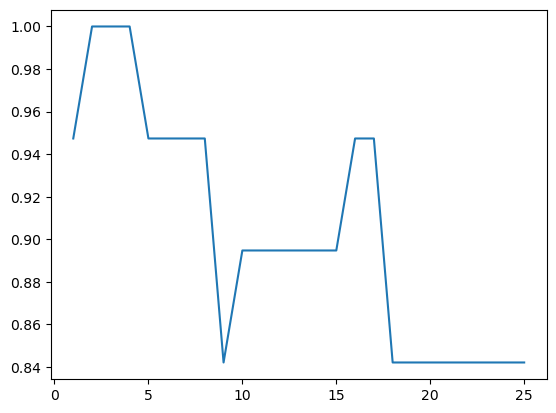

In [50]:
k_range = list(range(1, 26))
scores = []
for i in k_range:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
plt.plot(k_range, scores)
plt.show()

In [51]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.neighbors import KNeighborsClassifier

In [52]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=False).split(range(25))

In [53]:
print('{} {:^61} {}'.format('Iteration', 'Training set observations', 'Testing set observations'))
for iteration, data in enumerate(kf, start=1):
    print('{:^9} {} {:^25}'.format(iteration, data[0], str(data[1])))

Iteration                   Training set observations                   Testing set observations
    1     [ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]        [0 1 2 3 4]       
    2     [ 0  1  2  3  4 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]        [5 6 7 8 9]       
    3     [ 0  1  2  3  4  5  6  7  8  9 15 16 17 18 19 20 21 22 23 24]     [10 11 12 13 14]     
    4     [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 20 21 22 23 24]     [15 16 17 18 19]     
    5     [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]     [20 21 22 23 24]     


In [54]:
from sklearn.model_selection import cross_val_score

In [55]:
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(scores)

/Users/shruthivenkatachalam/mambaforge/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/shruthivenkatachalam/mambaforge/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the val

[0.96728462 0.9738277  0.97598253 0.95414847 0.97161572 0.97707424
 0.97161572 0.97489083 0.97489083 0.97052402]


/Users/shruthivenkatachalam/mambaforge/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/shruthivenkatachalam/mambaforge/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the val

In [56]:
print(scores.mean())

0.9711854680870313


In [57]:
# Initialize KNN classifier
knn = KNeighborsClassifier(n_neighbors=2)

In [58]:
#new_train = df[df['kind'] == 'train'].drop(['kind'], axis=1)
#new_test = df[df['kind'] == 'test'].drop(['kind', 'label'], axis=1)
#X_train = new_train.drop('label',axis=1)
#y_train = new_train['label']

In [59]:
mutual_info_scores = mutual_info_classif(X, y)

In [60]:
# Sort the features by their mutual information scores
sorted_indices = np.argsort(mutual_info_scores)[::-1]

In [61]:
feature_names = X.columns

In [62]:
list1 = []

In [63]:
for f in range(X.shape[1]):
    if (f<30):
        list1.append(feature_names[sorted_indices[f]])

In [64]:
list1

['clicks_by_user_ratio_perspective',
 'clicks_merchant_period_mean',
 'clicks_merchant',
 'clicks_merchant_period_max',
 'dates_merchant',
 'favorites_merchant_ratio',
 'clicks_merchant_ratio',
 'users_merchant',
 'clicks_merchant_period_5',
 'double11_clicks_merchant',
 'merchant_id',
 'purchases_merchant_ratio',
 'purchases_merchant_period_mean',
 'user_id',
 'double11_users_merchant',
 'favourites_merchant_period_mean',
 'clicks_merchant_period_2',
 'clicks_merchant_period_3',
 'clicks_user_merchant_period_5',
 'clicks_user_period_5',
 'purchases_merchant',
 'clicks_merchant_period_1',
 'clicks_merchant_period_4',
 'favourites_merchant_period_max',
 'favourites_merchant',
 'purchases_merchant_period_5',
 'double11_purchases_merchant',
 'purchases_merchant_period_1',
 'favourites_merchant_period_4',
 'purchases_by_user_ratio_perspective']

In [65]:
list1.insert(0,'label')

In [66]:
list1.insert(1,'kind')

In [67]:
K_df = df[list1]

In [68]:
K_df

,label,kind,clicks_by_user_ratio_perspective,clicks_merchant_period_mean,clicks_merchant,clicks_merchant_period_max,dates_merchant,favorites_merchant_ratio,clicks_merchant_ratio,users_merchant,clicks_merchant_period_5,double11_clicks_merchant,merchant_id,purchases_merchant_ratio,purchases_merchant_period_mean,user_id,double11_users_merchant,favourites_merchant_period_mean,clicks_merchant_period_2,clicks_merchant_period_3,clicks_user_merchant_period_5,clicks_user_period_5,purchases_merchant,clicks_merchant_period_1,clicks_merchant_period_4,favourites_merchant_period_max,favourites_merchant,purchases_merchant_period_5,double11_purchases_merchant,purchases_merchant_period_1,favourites_merchant_period_4,purchases_by_user_ratio_perspective
0,-1,train,0.003226,103.333333,310,285,39,0.032934,0.928144,227,285.0,81.0,2116,0.038922,4.333333,34944,68.0,3.666667,0.0,1.0,1.0,1.0,13,0.0,24.0,11,11,10.0,7.0,0.0,0.0,0.000000
1,-1,train,0.002525,79.200000,396,170,105,0.043062,0.947368,308,47.0,15.0,3990,0.009569,0.800000,252288,10.0,3.600000,93.0,170.0,0.0,0.0,4,11.0,75.0,10,18,2.0,2.0,0.0,3.0,0.000000
2,-1,train,0.001052,570.200000,2851,1130,114,0.012147,0.752839,1309,74.0,25.0,4255,0.235015,178.000000,210048,18.0,9.200000,731.0,1130.0,0.0,0.0,890,810.0,106.0,28,46,27.0,12.0,283.0,5.0,0.001124
3,-1,train,0.001052,570.200000,2851,1130,114,0.012147,0.752839,1309,74.0,25.0,4255,0.235015,178.000000,210048,18.0,9.200000,731.0,1130.0,0.0,0.0,890,810.0,106.0,28,46,27.0,12.0,283.0,5.0,0.001124
4,-1,train,0.001052,570.200000,2851,1130,114,0.012147,0.752839,1309,74.0,25.0,4255,0.235015,178.000000,210048,18.0,9.200000,731.0,1130.0,0.0,0.0,890,810.0,106.0,28,46,27.0,12.0,283.0,5.0,0.001124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9157,-1,test,0.009615,62.400000,312,168,81,0.035503,0.923077,237,21.0,10.0,2692,0.041420,2.800000,340607,7.0,2.400000,168.0,63.0,0.0,0.0,14,49.0,11.0,6,12,1.0,1.0,1.0,0.0,0.000000
9158,-1,test,0.009615,62.400000,312,168,81,0.035503,0.923077,237,21.0,10.0,2692,0.041420,2.800000,340607,7.0,2.400000,168.0,63.0,0.0,0.0,14,49.0,11.0,6,12,1.0,1.0,1.0,0.0,0.000000
9159,-1,test,0.009615,62.400000,312,168,81,0.035503,0.923077,237,21.0,10.0,2692,0.041420,2.800000,340607,7.0,2.400000,168.0,63.0,0.0,0.0,14,49.0,11.0,6,12,1.0,1.0,1.0,0.0,0.000000
9160,-1,test,0.009615,62.400000,312,168,81,0.035503,0.923077,237,21.0,10.0,2692,0.041420,2.800000,340607,7.0,2.400000,168.0,63.0,0.0,0.0,14,49.0,11.0,6,12,1.0,1.0,1.0,0.0,0.000000


## PCA for KNN

In [69]:
del pca_df

In [70]:
pca_df = K_df.drop(['kind', 'label'], axis=1)
pca = PCA(n_components=PCA_COMPONENTS)
pca.fit(pca_df)
K_df = K_df.join(pd.DataFrame(pca.transform(pca_df), index=pca_df.index).add_prefix('pca_'))

In [71]:
K_df

,label,kind,clicks_by_user_ratio_perspective,clicks_merchant_period_mean,clicks_merchant,clicks_merchant_period_max,dates_merchant,favorites_merchant_ratio,clicks_merchant_ratio,users_merchant,clicks_merchant_period_5,double11_clicks_merchant,merchant_id,purchases_merchant_ratio,purchases_merchant_period_mean,user_id,double11_users_merchant,favourites_merchant_period_mean,clicks_merchant_period_2,clicks_merchant_period_3,clicks_user_merchant_period_5,clicks_user_period_5,purchases_merchant,clicks_merchant_period_1,clicks_merchant_period_4,favourites_merchant_period_max,favourites_merchant,purchases_merchant_period_5,double11_purchases_merchant,purchases_merchant_period_1,favourites_merchant_period_4,purchases_by_user_ratio_perspective,pca_0,pca_1,pca_2,pca_3,pca_4
0,-1,train,0.003226,103.333333,310,285,39,0.032934,0.928144,227,285.0,81.0,2116,0.038922,4.333333,34944,68.0,3.666667,0.0,1.0,1.0,1.0,13,0.0,24.0,11,11,10.0,7.0,0.0,0.0,0.000000,179810.176374,1602.104640,2.814646,270.731550,68.016896
1,-1,train,0.002525,79.200000,396,170,105,0.043062,0.947368,308,47.0,15.0,3990,0.009569,0.800000,252288,10.0,3.600000,93.0,170.0,0.0,0.0,4,11.0,75.0,10,18,2.0,2.0,0.0,3.0,0.000000,-37534.241282,473.775884,1449.730067,94.603771,-28.310218
2,-1,train,0.001052,570.200000,2851,1130,114,0.012147,0.752839,1309,74.0,25.0,4255,0.235015,178.000000,210048,18.0,9.200000,731.0,1130.0,0.0,0.0,890,810.0,106.0,28,46,27.0,12.0,283.0,5.0,0.001124,4704.097158,-2345.404042,-365.490107,-4.851581,-4.601452
3,-1,train,0.001052,570.200000,2851,1130,114,0.012147,0.752839,1309,74.0,25.0,4255,0.235015,178.000000,210048,18.0,9.200000,731.0,1130.0,0.0,0.0,890,810.0,106.0,28,46,27.0,12.0,283.0,5.0,0.001124,4704.097158,-2345.404042,-365.490107,-4.851581,-4.601452
4,-1,train,0.001052,570.200000,2851,1130,114,0.012147,0.752839,1309,74.0,25.0,4255,0.235015,178.000000,210048,18.0,9.200000,731.0,1130.0,0.0,0.0,890,810.0,106.0,28,46,27.0,12.0,283.0,5.0,0.001124,4704.097158,-2345.404042,-365.490107,-4.851581,-4.601452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9157,-1,test,0.009615,62.400000,312,168,81,0.035503,0.923077,237,21.0,10.0,2692,0.041420,2.800000,340607,7.0,2.400000,168.0,63.0,0.0,0.0,14,49.0,11.0,6,12,1.0,1.0,1.0,0.0,0.000000,-125852.916129,1385.809300,489.704982,-10.065871,37.857975
9158,-1,test,0.009615,62.400000,312,168,81,0.035503,0.923077,237,21.0,10.0,2692,0.041420,2.800000,340607,7.0,2.400000,168.0,63.0,0.0,0.0,14,49.0,11.0,6,12,1.0,1.0,1.0,0.0,0.000000,-125852.916129,1385.809300,489.704982,-10.065871,37.857975
9159,-1,test,0.009615,62.400000,312,168,81,0.035503,0.923077,237,21.0,10.0,2692,0.041420,2.800000,340607,7.0,2.400000,168.0,63.0,0.0,0.0,14,49.0,11.0,6,12,1.0,1.0,1.0,0.0,0.000000,-125852.916129,1385.809300,489.704982,-10.065871,37.857975
9160,-1,test,0.009615,62.400000,312,168,81,0.035503,0.923077,237,21.0,10.0,2692,0.041420,2.800000,340607,7.0,2.400000,168.0,63.0,0.0,0.0,14,49.0,11.0,6,12,1.0,1.0,1.0,0.0,0.000000,-125852.916129,1385.809300,489.704982,-10.065871,37.857975


In [72]:
new_train = K_df[K_df['kind'] == 'train'].drop(['kind'], axis=1)
new_test = K_df[K_df['kind'] == 'test'].drop(['kind', 'label'], axis=1)

In [73]:
# Separate majority and minority classes
df_majority = new_train[new_train.label==0]
df_minority = new_train[new_train.label==1]

In [74]:
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                   replace=False,    # sample without replacement
                                   n_samples=len(df_minority)*3, # to have the same number of samples as the minority class
                                   random_state=42)  # reproducible results

In [75]:
df_majority_downsampled

,label,clicks_by_user_ratio_perspective,clicks_merchant_period_mean,clicks_merchant,clicks_merchant_period_max,dates_merchant,favorites_merchant_ratio,clicks_merchant_ratio,users_merchant,clicks_merchant_period_5,double11_clicks_merchant,merchant_id,purchases_merchant_ratio,purchases_merchant_period_mean,user_id,double11_users_merchant,favourites_merchant_period_mean,clicks_merchant_period_2,clicks_merchant_period_3,clicks_user_merchant_period_5,clicks_user_period_5,purchases_merchant,clicks_merchant_period_1,clicks_merchant_period_4,favourites_merchant_period_max,favourites_merchant,purchases_merchant_period_5,double11_purchases_merchant,purchases_merchant_period_1,favourites_merchant_period_4,purchases_by_user_ratio_perspective,pca_0,pca_1,pca_2,pca_3,pca_4
4433,0,0.089552,16.75,67,37,29,0.041667,0.930556,47,37.0,13.0,2217,0.027778,0.5,372827,7.0,0.75,1.0,18.0,6.0,6.0,2,0.0,11.0,1,3,1.0,1.0,0.0,1.0,0.5000,-158072.648166,1966.314072,328.881761,-34.628891,-66.979836
4165,0,0.025000,20.00,40,32,18,0.047619,0.952381,27,32.0,6.0,4061,0.000000,0.0,217655,6.0,1.00,0.0,0.0,1.0,1.0,0,0.0,8.0,1,2,0.0,0.0,0.0,1.0,0.0000,-2901.031528,793.411240,1792.876541,-31.782064,-33.753593
3203,0,0.002525,79.20,396,170,105,0.043062,0.947368,308,47.0,15.0,3990,0.009569,0.8,63392,10.0,3.60,93.0,170.0,0.0,0.0,4,11.0,75.0,10,18,2.0,2.0,0.0,3.0,0.0000,151361.732778,377.925720,1425.195846,92.025370,-30.102813
3733,0,0.014252,105.25,421,226,89,0.074153,0.891949,336,226.0,85.0,1393,0.033898,4.0,82415,77.0,8.75,4.0,105.0,5.0,5.0,16,0.0,86.0,15,35,10.0,7.0,0.0,6.0,0.0625,132339.265103,1957.033445,-645.574690,264.070383,-16.043149
4044,0,0.005051,79.20,396,170,105,0.043062,0.947368,308,47.0,15.0,3990,0.009569,0.8,392744,10.0,3.60,93.0,170.0,0.0,0.0,4,11.0,75.0,10,18,2.0,2.0,0.0,3.0,0.0000,-177990.221995,545.046481,1467.972796,96.520972,-26.977312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,0,0.004751,105.25,421,226,89,0.074153,0.891949,336,226.0,85.0,1393,0.033898,4.0,306069,77.0,8.75,4.0,105.0,2.0,2.0,16,0.0,86.0,15,35,10.0,7.0,0.0,6.0,0.0000,-91314.704185,2070.519817,-616.526521,267.104066,-13.908156
522,0,0.004751,105.25,421,226,89,0.074153,0.891949,336,226.0,85.0,1393,0.033898,4.0,13272,77.0,8.75,4.0,105.0,0.0,0.0,16,0.0,86.0,15,35,10.0,7.0,0.0,6.0,0.0000,201482.255608,1921.947369,-654.555959,263.094656,-16.678403
2779,0,0.012626,79.20,396,170,105,0.043062,0.947368,308,47.0,15.0,3990,0.009569,0.8,135001,10.0,3.60,93.0,170.0,5.0,5.0,4,11.0,75.0,10,18,2.0,2.0,0.0,3.0,0.0000,79752.742613,414.263101,1434.497404,93.034763,-29.444143
95,0,0.014925,16.75,67,37,29,0.041667,0.930556,47,37.0,13.0,2217,0.027778,0.5,99213,7.0,0.75,1.0,18.0,1.0,1.0,2,0.0,11.0,1,3,1.0,1.0,0.0,1.0,0.0000,115541.314261,1827.474714,293.343352,-38.395554,-69.555355


In [76]:
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

In [77]:
# Display class counts before and after downsampling
print('Original class distribution:\n', new_df.label.value_counts())
print('Downsampled class distribution:\n', df_downsampled.label.value_counts())

Original class distribution:
 0    9139
1      23
Name: label, dtype: int64
Downsampled class distribution:
 0    69
1    23
Name: label, dtype: int64


In [78]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df_downsampled.drop('label', axis=1), 
                                                    df_downsampled['label'], 
                                                    test_size=0.2, 
                                                    random_state=42)

In [79]:
# knn.fit(X_train, y_train)

In [80]:
# accuracy = knn.score(X_test, y_test)
# accuracy

In [81]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.8947368421052632


/Users/shruthivenkatachalam/mambaforge/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [82]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [83]:
print(metrics.accuracy_score(y_test, y_pred))

0.8947368421052632


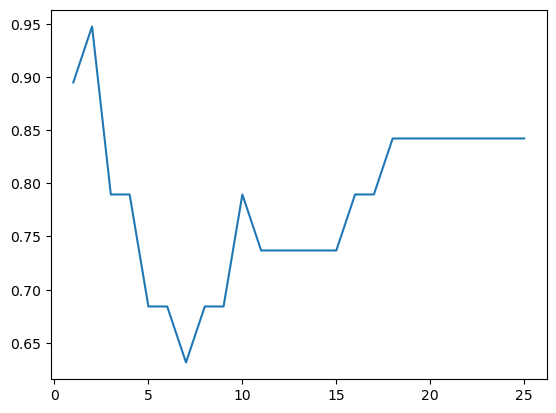

In [84]:
k_range = list(range(1, 26))
scores = []
for i in k_range:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
plt.plot(k_range, scores)
plt.show()

In [85]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=False).split(range(25))

In [86]:
print('{} {:^61} {}'.format('Iteration', 'Training set observations', 'Testing set observations'))
for iteration, data in enumerate(kf, start=1):
    print('{:^9} {} {:^25}'.format(iteration, data[0], str(data[1])))

Iteration                   Training set observations                   Testing set observations
    1     [ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]        [0 1 2 3 4]       
    2     [ 0  1  2  3  4 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]        [5 6 7 8 9]       
    3     [ 0  1  2  3  4  5  6  7  8  9 15 16 17 18 19 20 21 22 23 24]     [10 11 12 13 14]     
    4     [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 20 21 22 23 24]     [15 16 17 18 19]     
    5     [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]     [20 21 22 23 24]     


In [87]:
from sklearn.model_selection import cross_val_score

knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(scores)

[0.96728462 0.9738277  0.97598253 0.95414847 0.97161572 0.97707424
 0.97161572 0.97489083 0.97489083 0.97052402]


In [88]:
print(scores.mean())

0.9711854680870313


In [109]:
df

,user_id,merchant_id,label,kind,gender,age_0,age_2,age_3,age_4,age_5,age_6,age_7,age_8,items_user,categories_user,merchants_user,brands_user,dates_user,action_types_user,periods_user,users_merchant,items_merchant,categories_merchant,brands_merchant,dates_merchant,action_types_merchant,periods_merchant,items_user_merchant,categories_user_merchant,brands_user_merchant,dates_user_merchant,action_types_user_merchant,periods_user_merchant,clicks_user,purchases_user,favourites_user,clicks_merchant,purchases_merchant,favourites_merchant,clicks_user_merchant,purchases_user_merchant,favourites_user_merchant,clicks_in_merchant_ratio_perspective,purchases_in_merchant_ratio_perspective,favourites_in_merchant_ratio_perspective,clicks_by_user_ratio_perspective,purchases_by_user_ratio_perspective,favourites_by_user_ratio_perspective,clicks_user_ratio,purchases_user_ratio,favourites_user_ratio,clicks_user_merchant_ratio,purchases_user_merchant_ratio,favourites_user_merchant_ratio,clicks_merchant_ratio,purchases_merchant_ratio,favorites_merchant_ratio,interval,clicks_user_period_max,purchases_user_period_max,favourites_user_period_max,clicks_user_period_mean,purchases_user_period_mean,favourites_user_period_mean,clicks_user_period_0,clicks_user_period_1,clicks_user_period_2,clicks_user_period_3,clicks_user_period_4,clicks_user_period_5,favourites_user_period_0,favourites_user_period_1,favourites_user_period_2,favourites_user_period_3,favourites_user_period_4,favourites_user_period_5,purchases_user_period_0,purchases_user_period_1,purchases_user_period_2,purchases_user_period_3,purchases_user_period_4,purchases_user_period_5,clicks_merchant_period_max,purchases_merchant_period_max,favourites_merchant_period_max,clicks_merchant_period_mean,purchases_merchant_period_mean,favourites_merchant_period_mean,clicks_merchant_period_0,clicks_merchant_period_1,clicks_merchant_period_2,clicks_merchant_period_3,clicks_merchant_period_4,clicks_merchant_period_5,favourites_merchant_period_0,favourites_merchant_period_1,favourites_merchant_period_2,favourites_merchant_period_3,favourites_merchant_period_4,favourites_merchant_period_5,purchases_merchant_period_0,purchases_merchant_period_1,purchases_merchant_period_2,purchases_merchant_period_3,purchases_merchant_period_4,purchases_merchant_period_5,clicks_user_merchant_period_0,clicks_user_merchant_period_1,clicks_user_merchant_period_2,clicks_user_merchant_period_3,clicks_user_merchant_period_4,clicks_user_merchant_period_5,favourites_user_merchant_period_0,favourites_user_merchant_period_1,favourites_user_merchant_period_2,favourites_user_merchant_period_3,favourites_user_merchant_period_4,favourites_user_merchant_period_5,purchases_user_merchant_period_0,purchases_user_merchant_period_1,purchases_user_merchant_period_2,purchases_user_merchant_period_3,purchases_user_merchant_period_4,purchases_user_merchant_period_5,double11_items_user,double11_categories_user,double11_merchants_user,double11_brands_user,double11_dates_user,double11_action_types_user,double11_periods_user,double11_users_merchant,double11_items_merchant,double11_categories_merchant,double11_brands_merchant,double11_dates_merchant,double11_action_types_merchant,double11_periods_merchant,double11_items_user_merchant,double11_categories_user_merchant,double11_brands_user_merchant,double11_dates_user_merchant,double11_action_types_user_merchant,double11_periods_user_merchant,double11_clicks_user,double11_purchases_user,double11_favourites_user,double11_clicks_merchant,double11_purchases_merchant,double11_favourites_merchant,double11_clicks_user_merchant,double11_purchases_user_merchant,double11_favourites_user_merchant
0,34944,2116,-1,train,0,0,0,0,0,1,0,0,0,1,1,1,1,1,1,1,227,1,1,1,39,3,3,1,1,1,1,1,1,1,0,0,310,13,11,1,0,0,1.0,0.0,0.0,0.003226,0.000000,0.000000,1.00,0.00,0.00,1.00,0.00,0.00,0.928144,0.038922,0.032934,0,1,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,285,10,11,103.333333,4.333333,3.666667,

# Parzen window 

In [116]:
df['favorites_merchant_ratio'].unique()

array([0.03293413, 0.0430622 , 0.01214682, 0.04651163, 0.07415254,
       0.01470588, 0.04166667, 0.        , 0.03333333, 0.05660377,
       0.0295858 , 0.09090909, 0.03921569, 0.03550296, 0.04833837,
       0.092827  , 0.01612903, 0.03508772, 0.30769231, 0.05921053,
       0.04878049, 0.0875    , 0.01960784, 0.02439024, 0.02325581,
       0.03125   , 0.09090909, 0.05882353, 0.06818182, 0.07142857,
       0.04761905, 0.04761905, 0.06896552, 0.06      , 0.08695652,
       0.03448276, 0.04651163, 0.07692308, 0.28571429, 0.2       ,
       0.125     , 0.22222222, 0.13333333, 0.27272727, 0.08333333,
       0.1       , 0.33333333, 0.5       ])

<AxesSubplot:>

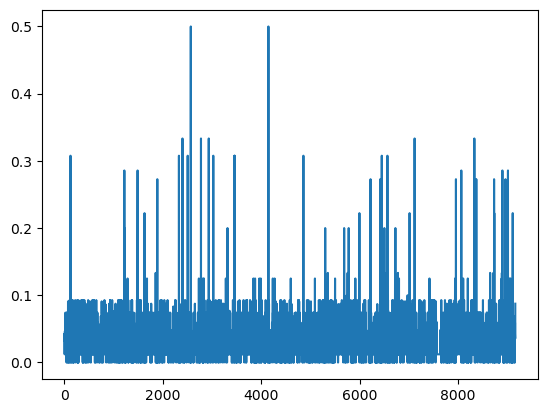

In [117]:
df['favorites_merchant_ratio'].plot()

<AxesSubplot:xlabel='favorites_merchant_ratio', ylabel='Density'>

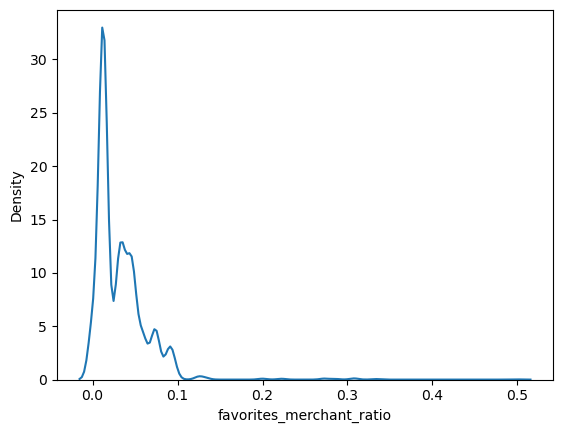

In [118]:
import seaborn as sns
sns.kdeplot(df['favorites_merchant_ratio'])

In [119]:
import numpy as np
X = df['favorites_merchant_ratio'].values[:, np.newaxis]
from sklearn.neighbors import KernelDensity
# import sklearn
kde10 = KernelDensity(kernel='gaussian', bandwidth=10)
kde10.fit(X)
kde40 = KernelDensity(kernel='gaussian', bandwidth=40)
kde40.fit(X)
kde100 = KernelDensity(kernel='gaussian', bandwidth=100)
kde100.fit(X)

KernelDensity(bandwidth=100)

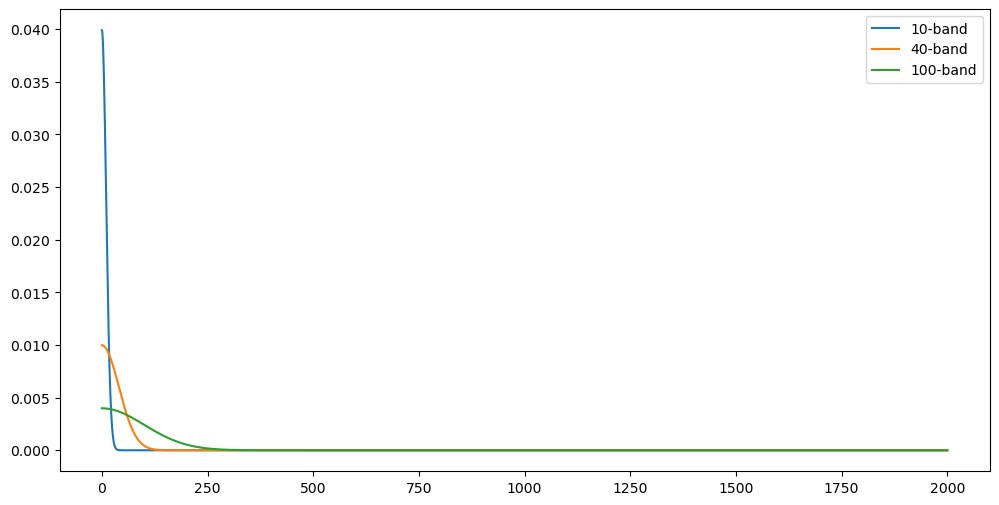

In [120]:
n2000 = np.array(list(range(0, 2001)))[:, np.newaxis]

fig, ax = plt.subplots(1, figsize=(12, 6))
ax.plot(n2000, np.exp(kde10.score_samples(n2000)), label='10-band')
ax.plot(n2000, np.exp(kde40.score_samples(n2000)), label='40-band')
ax.plot(n2000, np.exp(kde100.score_samples(n2000)), label='100-band')
ax.legend()

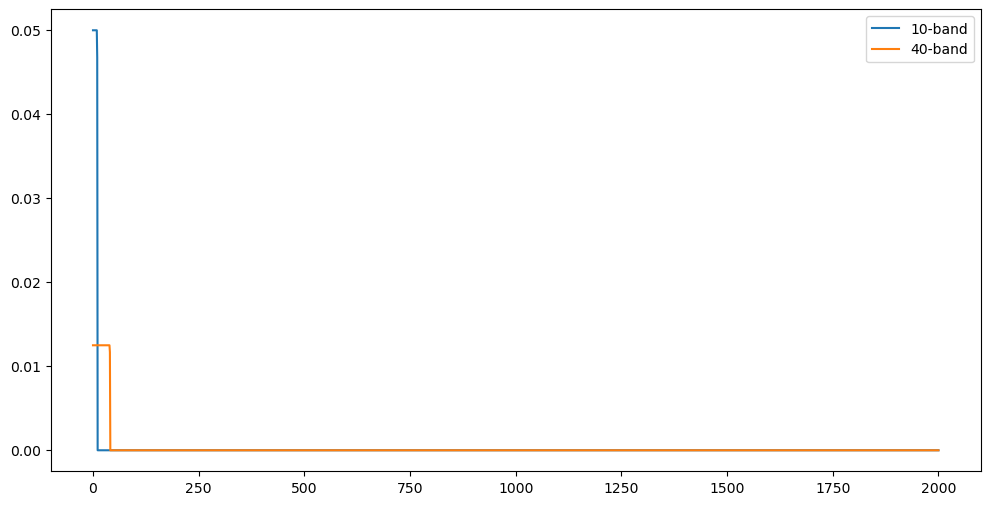

In [121]:
kde10tophat = KernelDensity(kernel='tophat', bandwidth=10).fit(X)
kde40tophat = KernelDensity(kernel='tophat', bandwidth=40).fit(X)

fig, ax = plt.subplots(1, figsize=(12, 6))
ax.plot(n2000, np.exp(kde10tophat.score_samples(n2000)), label='10-band')
ax.plot(n2000, np.exp(kde40tophat.score_samples(n2000)), label='40-band')
ax.legend()